In [30]:
import pandas as pd
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pathlib import Path

In [41]:
df = pd.read_csv("C:/Users/smoot/anaconda3/Bootcamp/Project-4/resources/heart_data.csv")

In [42]:
df[['Height_(cm)','Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption','FriedPotato_Consumption']] = df[['Height_(cm)','Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption','FriedPotato_Consumption']].astype('int64')


In [43]:
df.drop(df[df['Diabetes'] == "Yes, but female told only during pregnancy"].index, inplace = True)
df.drop(df[df['Diabetes'] == "No, pre-diabetes or borderline diabetes"].index, inplace = True)

In [44]:
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)


In [45]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,0,0,Male,80+,191,88.45,24.37,1,0,8,4,0


In [46]:
features_df = df.drop(['Heart_Disease','Checkup','General_Health'],axis=1)

In [47]:
features_df = pd.get_dummies(features_df,columns=['Age_Category','Sex'])

In [48]:
features_df.head()

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Height_(cm),Weight_(kg),BMI,Smoking_History,...,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Sex_Female,Sex_Male
0,0,0,0,0,0,1,150,32.66,14.54,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,165,77.11,28.29,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,163,88.45,33.47,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,180,93.44,28.73,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,191,88.45,24.37,1,...,0,0,0,0,0,0,0,1,0,1


In [49]:
target_df = df['Heart_Disease'].ravel()
target_df[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, random_state=78)

In [51]:
scaler=StandardScaler()

In [52]:
X_scaler = scaler.fit(X_train)

In [53]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [55]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [56]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [57]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [58]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68691,169
Actual 1,5855,113


Accuracy Score : 0.9194953760624365
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     68860
           1       0.40      0.02      0.04      5968

    accuracy                           0.92     74828
   macro avg       0.66      0.51      0.50     74828
weighted avg       0.88      0.92      0.88     74828



In [60]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, features_df.columns), reverse=True)

[(0.1635679284127279, 'BMI'),
 (0.14260333389749472, 'Weight_(kg)'),
 (0.10664654009593683, 'Green_Vegetables_Consumption'),
 (0.10367030715475746, 'Fruit_Consumption'),
 (0.10352547566479686, 'Height_(cm)'),
 (0.10042010449032722, 'FriedPotato_Consumption'),
 (0.06238530923571582, 'Alcohol_Consumption'),
 (0.027675233522235453, 'Diabetes'),
 (0.020129387705665303, 'Arthritis'),
 (0.018606583713647387, 'Depression'),
 (0.017082440807336993, 'Age_Category_80+'),
 (0.01592371184554486, 'Exercise'),
 (0.015539023971576133, 'Smoking_History'),
 (0.013965032017748489, 'Skin_Cancer'),
 (0.013943045581593214, 'Other_Cancer'),
 (0.010832049405138672, 'Age_Category_75-79'),
 (0.009816650779497763, 'Age_Category_70-74'),
 (0.008784906067985956, 'Age_Category_65-69'),
 (0.007596096155112661, 'Age_Category_60-64'),
 (0.006464213312769199, 'Sex_Female'),
 (0.006453549235692911, 'Age_Category_55-59'),
 (0.006013199186995285, 'Sex_Male'),
 (0.004861494489783339, 'Age_Category_50-54'),
 (0.00366758478

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

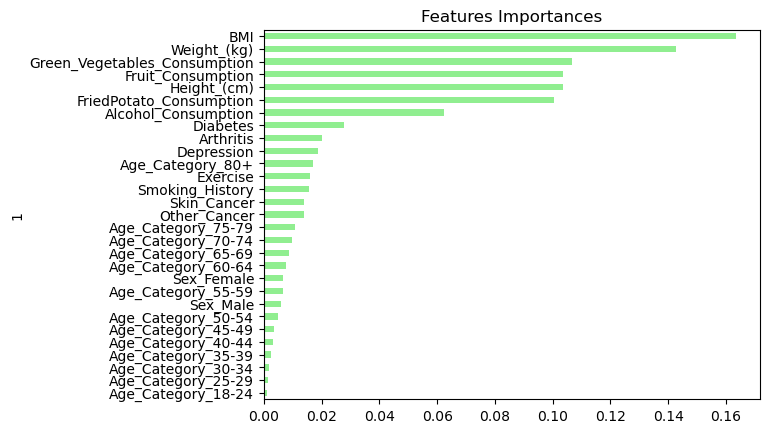

In [62]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features_df.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)